# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [67]:
# Your code here. 

import pandas as pd
import numpy as np
import scipy as ss

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [117]:
student_data = pd.DataFrame({'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
     'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

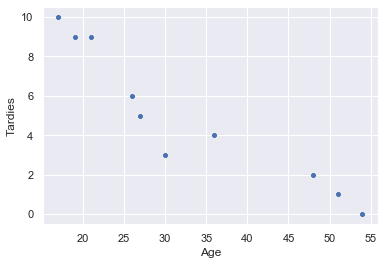

In [69]:
# Your code here.

sns.set()
sns.scatterplot(x='Age', y='Tardies', data=student_data)


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [70]:
# Your response here. 

#Sim, conforme a idade aumenta, o número de atrasos diminui.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [71]:
# Your response here.

ss.cov(student_data['Age'], student_data['Tardies'])


array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [72]:
def df_cov(cols):
    df = pd.DataFrame(ss.cov(cols.T))
    df.columns = cols.columns
    return(df)

In [73]:
df_cov(student_data[['Age', 'Tardies']])

,Age,Tardies
0,187.655556,-45.566667
1,-45.566667,12.544444


In [74]:
from scipy.stats import pearsonr

In [118]:
corr, _ = pearsonr(student_data['Age'], student_data['Tardies'])

In [76]:
corr

-0.9391626886887122

In [ ]:
# A covariância mede se as variáveis são independentes ou não. Já a correlação, mede se são positivas ou negativas.
# Há uma correlação negativa e fraca. 
# Covariâncias mais próximas de zero indicam maior independência.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [77]:
# Your response here.

X = pd.DataFrame(student_data['Age'])

# dependent variable

y = pd.DataFrame(student_data['Tardies'])



In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [79]:
linReg = LinearRegression()

In [80]:
model = linReg.fit(X_train, y_train)

In [81]:
y_pred_test = linReg.predict(X_test)

In [82]:
y_pred_test

array([[7.70032573],
       [5.61889251],
       [8.16286645]])

In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [84]:
def lm_test(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rme = np.sqrt(mean_absolute_error(y_test, y_test))
    df_test = pd.DataFrame({'Mean Absolute Error':[mae], 
                           'Mean Squared Error': [mse],
                           'Root Mean Squared Error': [rme]})
    df_test = df_test.T
    df_test.columns = ['lm_test']
    return(df_test)

In [85]:
lm_test(y_test, y_pred_test)

,lm_test
Mean Absolute Error,1.585233
Mean Squared Error,3.082848
Root Mean Squared Error,0.000000


In [86]:
def lm(col_x, col_y):
    # get numpy arrays from series
    X = col_x.values
    y = col_y.values
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=43)
    return(y_test)

In [87]:
lm(student_data['Age'], student_data['Tardies'])

array([9, 3, 9], dtype=int64)

In [88]:
y_pred = linReg.predict(X)


In [89]:
student_data.head(1)

,StudentID,Age,Tardies
0,1,17,10


In [90]:
b = linReg.coef_

In [91]:
m = linReg.intercept_

Plot your regression model on your scatter plot.

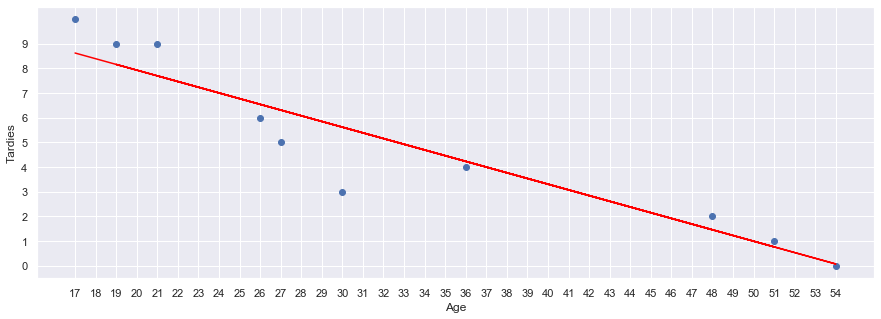

In [93]:
# Your code here.

# visualize the results
plt.figure(figsize=(15,5))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Tardies')

# set the ticks
plt.yticks(np.arange(0, 10, step=1))
plt.xticks(np.arange(17, 55, step=1))
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [95]:
# Your response here. 



## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
# Import any libraries you may need & the data

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [36]:
# Your response here. 

vehicles = pd.read_csv('vehicles.csv')

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [107]:
# Your response here. 

cols = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 
        'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

vehicles_n = vehicles[cols]

vehicles_n.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


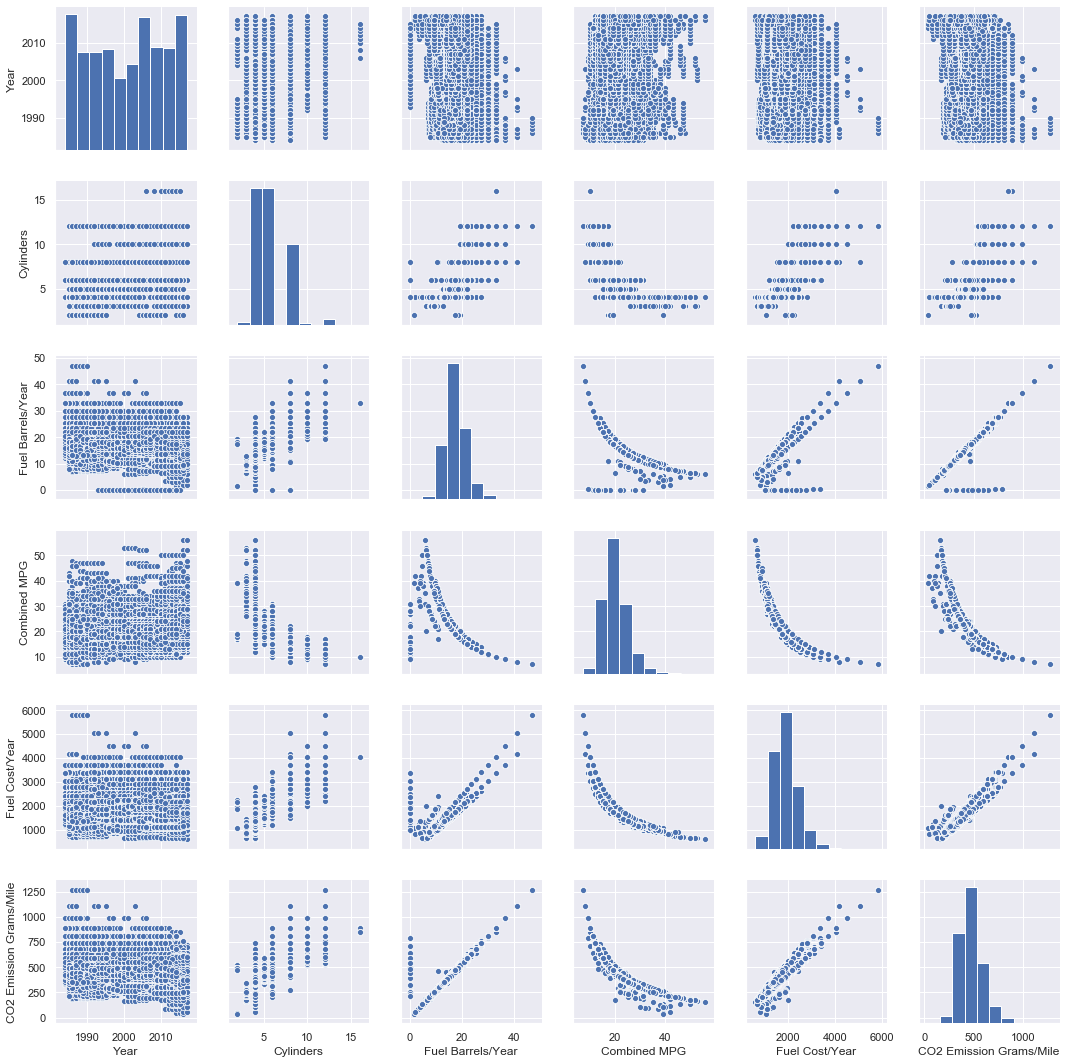

In [108]:
sns.pairplot(vehicles_n)

In [109]:
corr1, _ = pearsonr(vehicles['Year'], 
                    vehicles_n['CO2 Emission Grams/Mile'])
corr1

-0.22229960295054224

In [110]:
corr2, _ = pearsonr(vehicles['Cylinders'], 
                    vehicles_n['CO2 Emission Grams/Mile'])
corr2

0.7523925537297487

In [111]:
corr3, _ = pearsonr(vehicles['Fuel Barrels/Year'], 
                    vehicles_n['CO2 Emission Grams/Mile'])
corr3

0.9861886621428729

In [112]:
corr4, _ = pearsonr(vehicles['Combined MPG'], 
                    vehicles_n['CO2 Emission Grams/Mile'])
corr4

-0.9262290389336445

In [114]:
X2 = vehicles_n.drop('CO2 Emission Grams/Mile', axis=1)
y2 = pd.DataFrame(data=vehicles['CO2 Emission Grams/Mile'], 
                  columns=['CO2 Emission Grams/Mile'])

logReg2 = LinearRegression()
model2 = logReg2.fit(X2, y2)

y2_pred = model2.predict(X2)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [116]:
# Your response here. 

from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y2, y2_pred))
print(r2_score(y2, y2_pred))


271.11965507029964
0.9808734920269122


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [98]:
# Your code here. 

party_people = pd.DataFrame({'Invited': [1, 3, 4, 6, 8, 9, 11, 14], 'Attended': [1, 2, 4, 4, 5, 7, 8, 13]})

party_people 

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

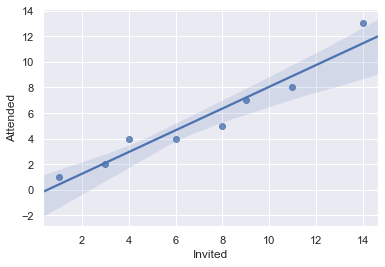

In [102]:
# Your code here.

sns.regplot(party_people['Invited'], party_people['Attended']);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [104]:
# Your response here. 

X3 = pd.DataFrame(party_people['Invited'])
y3 = pd.DataFrame(party_people['Attended'])

logReg3 = LinearRegression()
lm3 = logReg3.fit(X, y)
print(lm3.intercept_)
print(lm3.coef_)


[12.88880336]
[[-0.24282077]]


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 